<a href="https://colab.research.google.com/github/Dansah2/Udacity_Tutorials/blob/main/Udacity_NLP_Improve_Embedding_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [6]:
# get the data
!wget --no-check-certificate \
    https://drive.google.com/uc?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P \
    -O /tmp/sentiment.csv

--2023-06-26 20:06:02--  https://drive.google.com/uc?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P
Resolving drive.google.com (drive.google.com)... 74.125.203.100, 74.125.203.113, 74.125.203.139, ...
Connecting to drive.google.com (drive.google.com)|74.125.203.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-ak-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/gtecup6bbje361j33lmi1irmt76h2cve/1687809900000/11118900490791463723/*/13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P?uuid=47591f5f-7b95-4715-9a0b-2f0e0b3cb085 [following]
--2023-06-26 20:06:03--  https://doc-08-ak-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/gtecup6bbje361j33lmi1irmt76h2cve/1687809900000/11118900490791463723/*/13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P?uuid=47591f5f-7b95-4715-9a0b-2f0e0b3cb085
Resolving doc-08-ak-docs.googleusercontent.com (doc-08-ak-docs.googleusercontent.com)... 64.233.188.132, 2404:6800:4008:c06::84
Connecting to doc-08

In [11]:
import numpy as np
import pandas as pd

# read the dataset into a dataframe
dataset = pd.read_csv('/tmp/sentiment.csv')

# define sentences and labels as lists
sentences = dataset['text'].tolist()
labels = dataset['sentiment'].tolist()

# seperate sentences and labels into training and test sets
training_size = int(len(sentences) * 0.8)

training_sentences = sentences[0:training_size]
training_labels = labels[0:training_size]
testing_sentences = sentences[training_size:]
testing_labels = labels[training_size:]

# convert labels into numpy array for training and testing
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [12]:
# tokenize the data
# this time decrease the vocab_size and add an out of vocab token

vocab_size = 50
embedding_dim = 16
max_length = 50
trunc_type = 'post'
padding_type= 'post'
oov_tok = '<OOV>'

# create an instance of the tokenizer
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length,
                                padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length,
                               padding=padding_type, truncating=trunc_type)

In [10]:
# train the model
# use GlobalAveragePooling1D
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 16)            800       
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 6)                 102       
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 909
Trainable params: 909
Non-trainable params: 0
_________________________________________________________________


In [13]:
num_epochs = 30
history = model.fit(training_padded, training_labels_final,
                    epochs=num_epochs, validation_data=(testing_padded,
                                                        testing_labels_final))

Epoch 1/30
50/50 [==============================] - 2s 8ms/step - loss: 0.6923 - accuracy: 0.5235 - val_loss: 0.6985 - val_accuracy: 0.4110
Epoch 2/30
50/50 [==============================] - 0s 3ms/step - loss: 0.6911 - accuracy: 0.5223 - val_loss: 0.7001 - val_accuracy: 0.4110
Epoch 3/30
50/50 [==============================] - 0s 4ms/step - loss: 0.6899 - accuracy: 0.5235 - val_loss: 0.6989 - val_accuracy: 0.4185
Epoch 4/30
50/50 [==============================] - 0s 3ms/step - loss: 0.6883 - accuracy: 0.5323 - val_loss: 0.6983 - val_accuracy: 0.4411
Epoch 5/30
50/50 [==============================] - 0s 4ms/step - loss: 0.6859 - accuracy: 0.5392 - val_loss: 0.6935 - val_accuracy: 0.5013
Epoch 6/30
50/50 [==============================] - 0s 4ms/step - loss: 0.6830 - accuracy: 0.5731 - val_loss: 0.6921 - val_accuracy: 0.4962
Epoch 7/30
50/50 [==============================] - 0s 3ms/step - loss: 0.6788 - accuracy: 0.5769 - val_loss: 0.6889 - val_accuracy: 0.5063
Epoch 8/30
50/50 [==

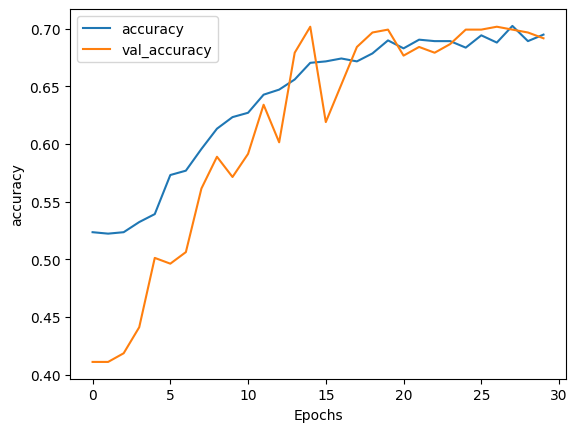

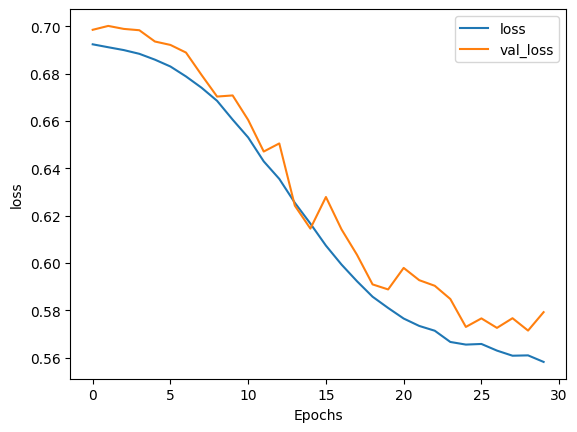

In [15]:
#visualize the data
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [16]:
# obtain weights for the embedding layer
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape)

(50, 16)


In [17]:
import io

#create the reverse word index
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# embedding vectors and metadata
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + '\n')
  out_v.write('\t'.join([str(x) for x in embeddings]) + 'n')
out_v.close()
out_m.close()

In [18]:
from sqlalchemy.sql.elements import ExpressionClauseList
# download the files
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
# predict sentiment in new reviews
fake_reviews = [
    'I love this phone', 'I hate noodles',
    'Everything was cold',
    'Everything was hot exactly as I wanted',
    'Everything was yellow',
    'the host seated us immediately',
    'they gave us free chocolate cake and did not charge us',
    'not sure aabout the wilted flowers on the table',
    'only works when I stand on tippy toes',
    'does not work when I stand on my hands'
]

print(fake_reviews)

# create sequences
padding_type = 'post'
sample_sentences = tokenizer.texts_to_sequences(fake_reviews)
fakes_padded = pad_sequences(sample_sentences, padding=padding_type, maxlen=max_length)

print('These reviews are completely genuine')

classes = model.predict(fakes_padded)

for x in range(len(fake_reviews)):
  print(fake_reviews[x])
  print(classes[x])
  print('\n')

['I love this phone', 'I hate noodles', 'Everything was cold', 'Everything was hot exactly as I wanted', 'Everything was yellow', 'the host seated us immediately', 'they gave us free chocolate cake and did not charge us', 'not sure aabout the wilted flowers on the table', 'only works when I stand on tippy toes', 'does not work when I stand on my hands']
These reviews are completely genuine
1/1 [==============================] - 0s 131ms/step
I love this phone
[0.5452864]


I hate noodles
[0.5092631]


Everything was cold
[0.4704869]


Everything was hot exactly as I wanted
[0.37368926]


Everything was yellow
[0.4704869]


the host seated us immediately
[0.46298808]


they gave us free chocolate cake and did not charge us
[0.19591486]


not sure aabout the wilted flowers on the table
[0.16703025]


only works when I stand on tippy toes
[0.80621153]


does not work when I stand on my hands
[0.16685475]


